In [1]:
import os, sys
# Reference: https://stackoverflow.com/questions/34478398/import-local-function-from-a-module-housed-in-another-directory-with-relative-im
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

from data.wine.Wine_Quality_Data import get_wine_dataset
import common_grid_search_analysis

import numpy as np
import pandas  as pd
import matplotlib.pyplot as plt

from sklearn import svm
from sklearn.model_selection import ShuffleSplit

PLOT_PREFIX = "Figures/WINE_SVM_PLOT_"
GLOBAL_FIG_COUNTER = 0

GS_FILE_NAME_PREFIX = "Analysis_Data/WINE_SVM_DATA"

In [2]:
import SVMs.common_SVM as common_SVM
X_train, X_test, y_train, y_test = get_wine_dataset()
num_features = X_train.shape[1]

In [3]:
import TrainingCurves
train_sizes, train_scores, test_scores, fit_times = TrainingCurves.perform_learning_curve(svm.SVC(), X_train, y_train, "balanced_accuracy")

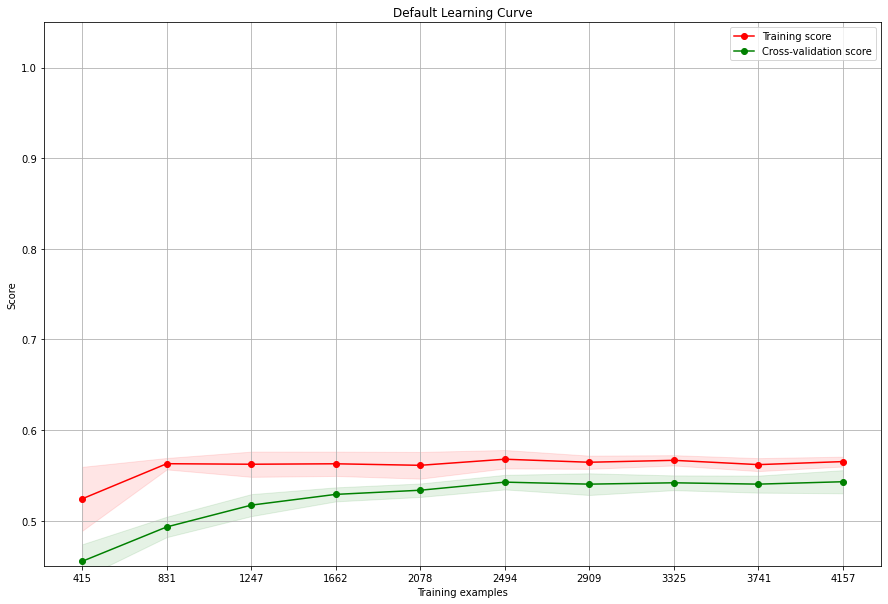

In [4]:
ylim=(0.45, 1.05)
TrainingCurves.plot_learning_curve(train_scores, test_scores, train_sizes, "Default Learning Curve", ylim=ylim)

In [5]:
C = [i for i in range(1, 15)]

gamma = [i for i in range(1, 10)]
# gamma = [0.1, 0.01, 0.001] + gamma
kernel = ["linear", "rbf", "poly"]
degree = [3, 4]
parameters = {"kernel": kernel, 'C': C, 'gamma': gamma}

gs = common_SVM.perform_grid_search(parameters, X_train, y_train,scoring='balanced_accuracy', GS_FILE_NAME_PREFIX=GS_FILE_NAME_PREFIX)

gs_results = gs

NOT performing Grid Search


Plot saved as:  Figures/WINE_SVM_PLOT_GS_ModelComplexity_C_gamma_kernel.png


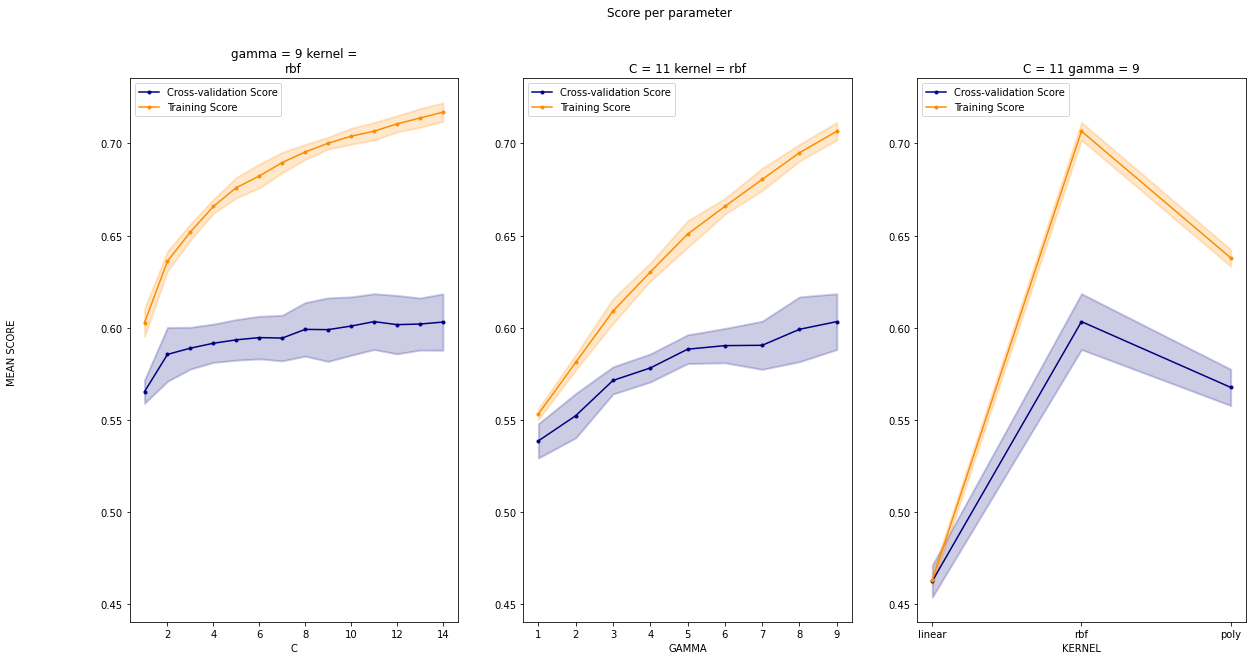

In [6]:
unused_params_values = {'gamma': 1, 'C': 1}
common_grid_search_analysis.plot_grid_search_model_complexity(gs_results, PLOT_PREFIX)

Plot saved as:  Figures/WINE_SVM_PLOT_GS_Times_C_gamma_kernel.png


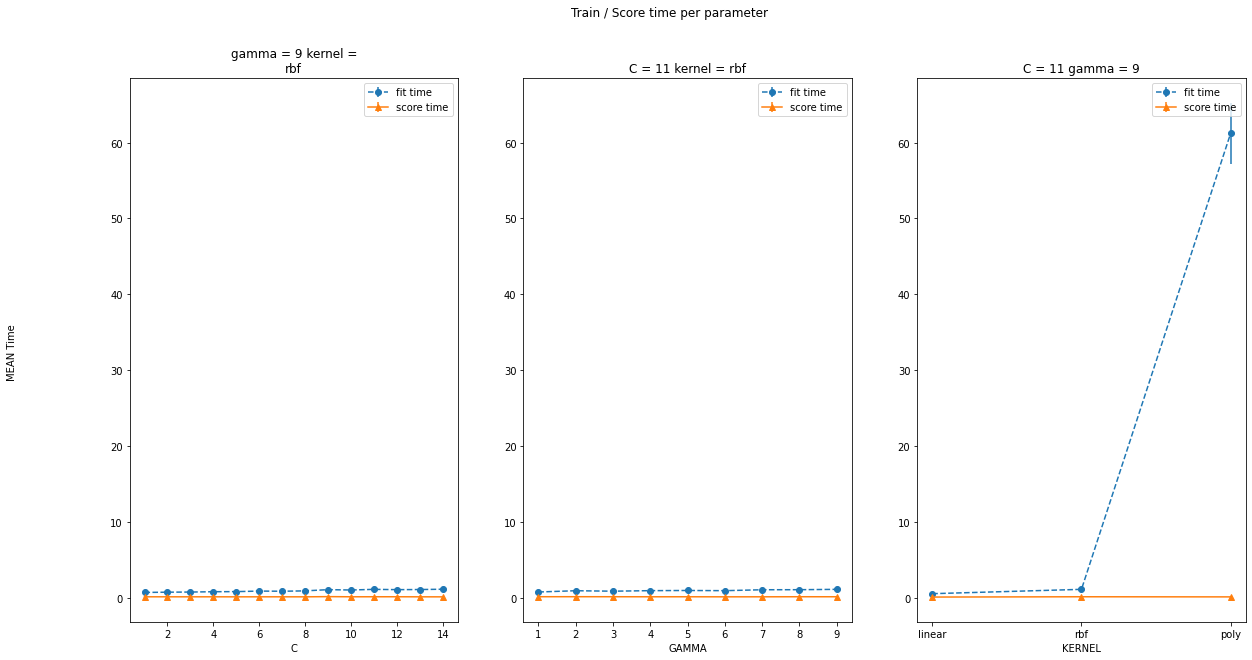

In [7]:
common_grid_search_analysis.plot_grid_search_training_times(gs_results, PLOT_PREFIX)

Plot saved as:  Figures/WINE_SVM_PLOT_GS_ModelComplexity_C_gamma_kernel.png


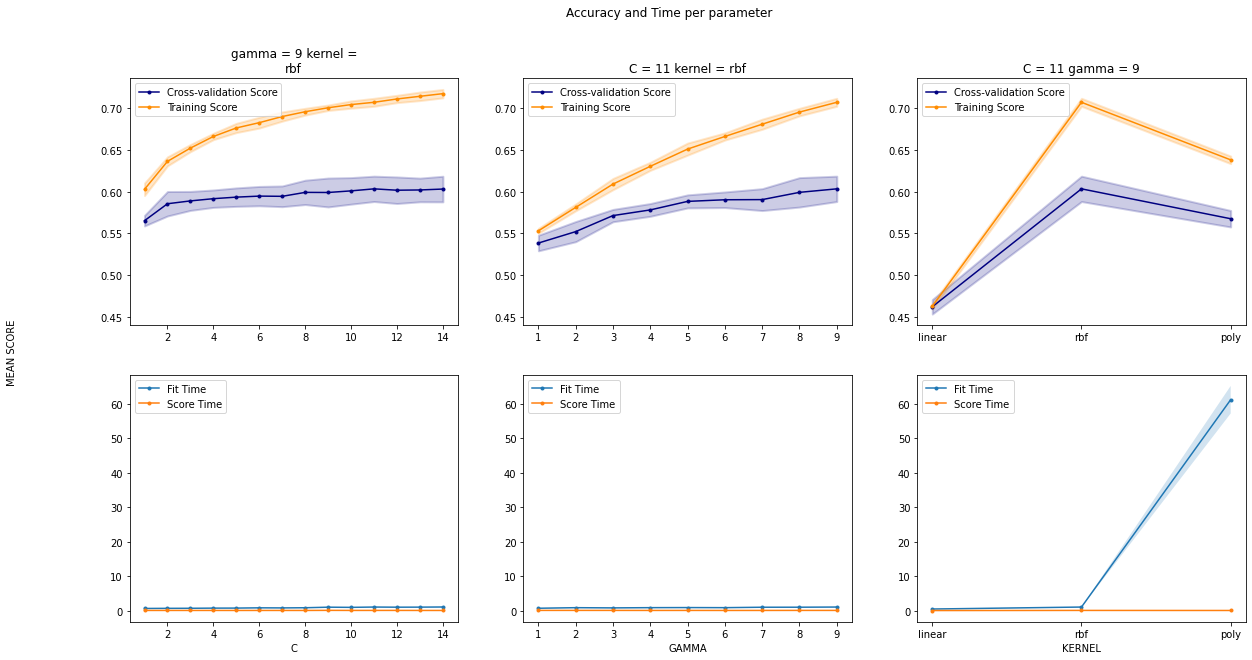

In [8]:
common_grid_search_analysis.plot_grid_search_model_complexity_and_training(gs_results, PLOT_PREFIX)

In [9]:
cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=0)
gamma = [i for i in range(1, 20, 2)]
C = [i for i in range(1, 20, 2)]
estimator = svm.SVC(kernel='rbf')

train_scores_mean_gamma, train_scores_std_gamma, test_scores_mean_gamma, test_scores_std_gamma = \
    TrainingCurves.perform_validation_curve(estimator, X_train, y_train, "gamma", gamma, 'balanced_accuracy', cv=cv)

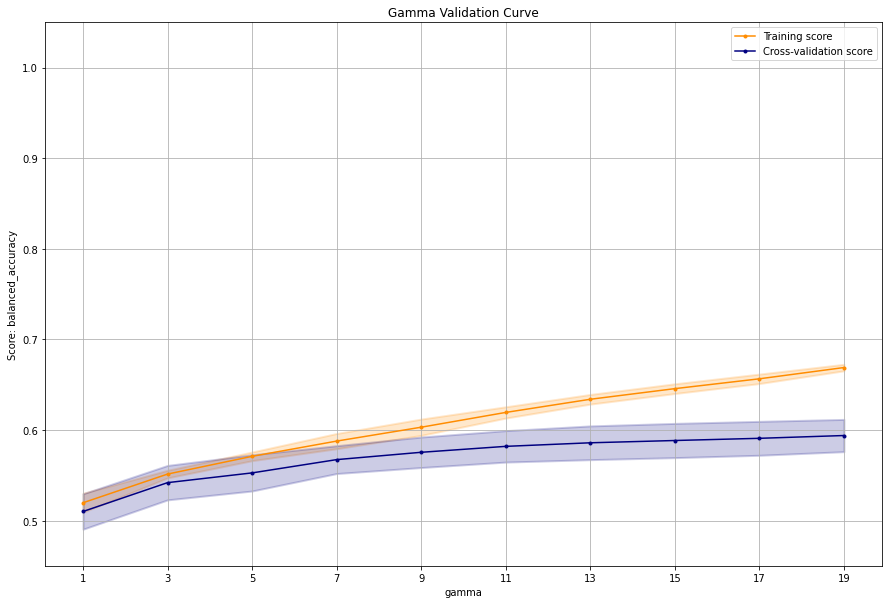

In [10]:
TrainingCurves.plot_validation_curve(train_scores_mean_gamma, train_scores_std_gamma, test_scores_mean_gamma, test_scores_std_gamma, \
    "gamma", gamma, title="Gamma Validation Curve", scoring="balanced_accuracy", ylim=ylim, tick_spacing=1)


In [11]:
train_scores_mean_C, train_scores_std_C, test_scores_mean_C, test_scores_std_C = \
    TrainingCurves.perform_validation_curve(estimator, X_train, y_train, "C", C, 'balanced_accuracy', cv=cv)

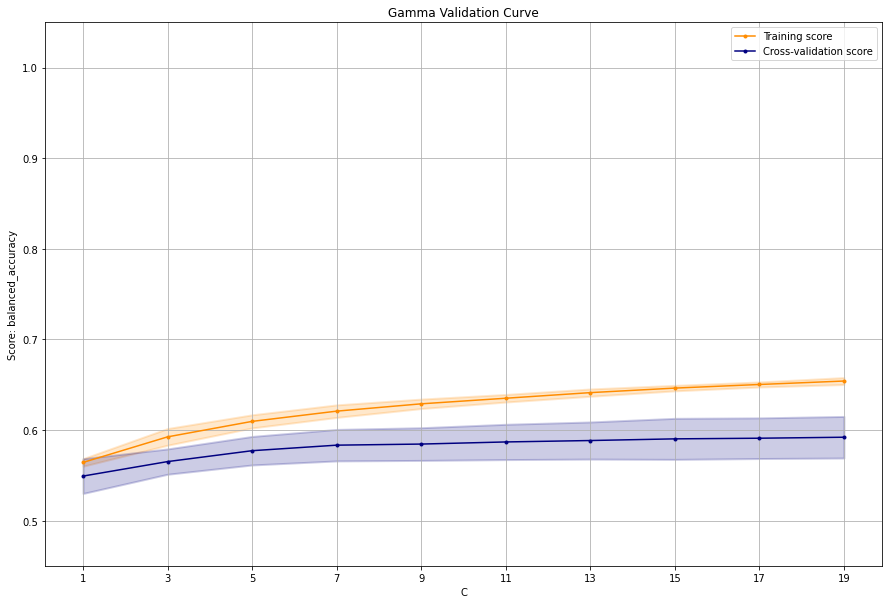

In [13]:
TrainingCurves.plot_validation_curve(train_scores_mean_C, train_scores_std_C, test_scores_mean_C, test_scores_std_C, \
    "C", C, title="Gamma Validation Curve", scoring="balanced_accuracy", ylim=ylim, tick_spacing=1)

In [14]:
estimator = svm.SVC(kernel='rbf', C=7)
train_scores_mean_gamma, train_scores_std_gamma, test_scores_mean_gamma, test_scores_std_gamma = \
    TrainingCurves.perform_validation_curve(estimator, X_train, y_train, "gamma", gamma, 'balanced_accuracy', cv=cv)

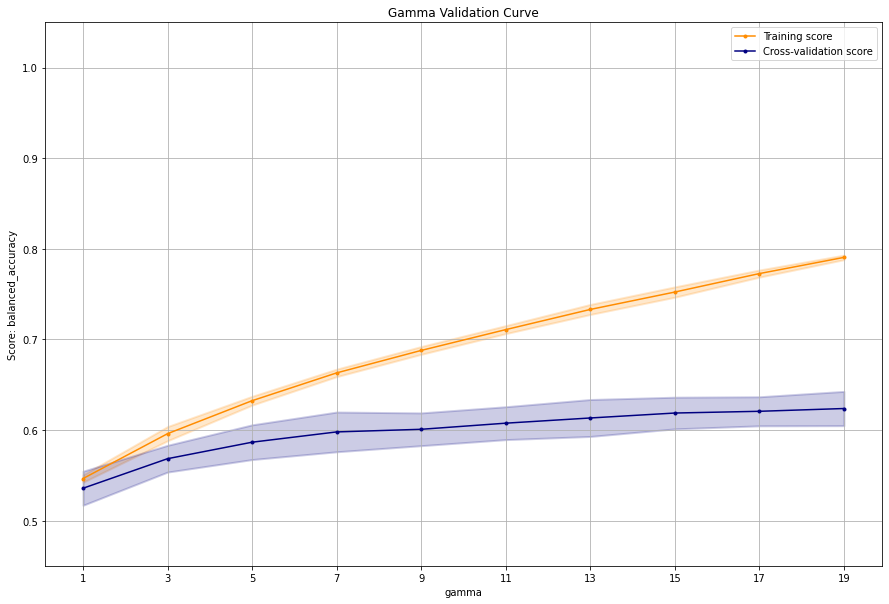

In [15]:
TrainingCurves.plot_validation_curve(train_scores_mean_gamma, train_scores_std_gamma, test_scores_mean_gamma, test_scores_std_gamma, \
    "gamma", gamma, title="Gamma Validation Curve C = 7", scoring="balanced_accuracy", ylim=ylim, tick_spacing=1)

In [16]:
train_sizes, train_scores, test_scores, fit_times = TrainingCurves.perform_learning_curve(\
    svm.SVC(kernel='rbf', C=7, gamma=7), X_train, y_train, "balanced_accuracy")

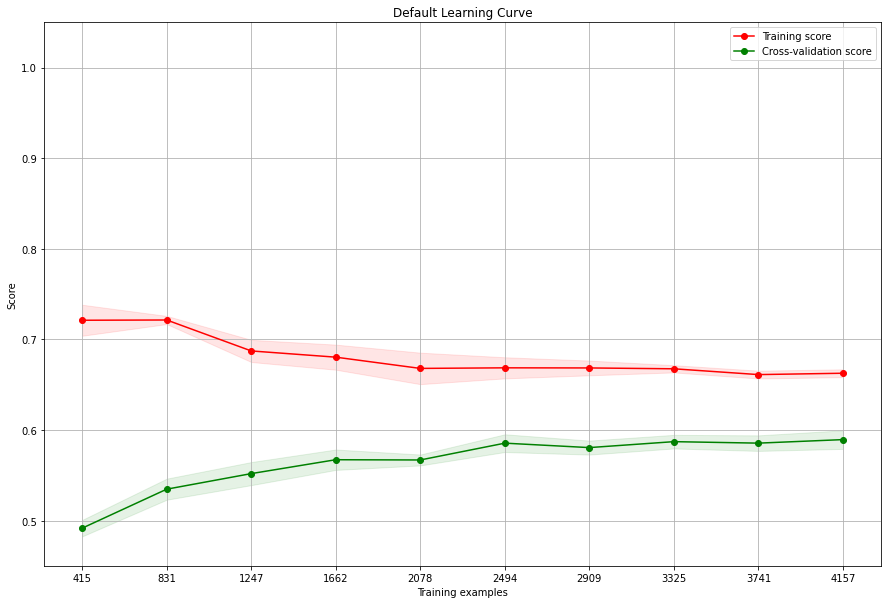

In [17]:
ylim=(0.45, 1.05)
TrainingCurves.plot_learning_curve(train_scores, test_scores, train_sizes, "Default Learning Curve", ylim=ylim)

Plot saved as:  Figures/WINE_SVM_PLOT_GridScore_kernel_gamma_0.png


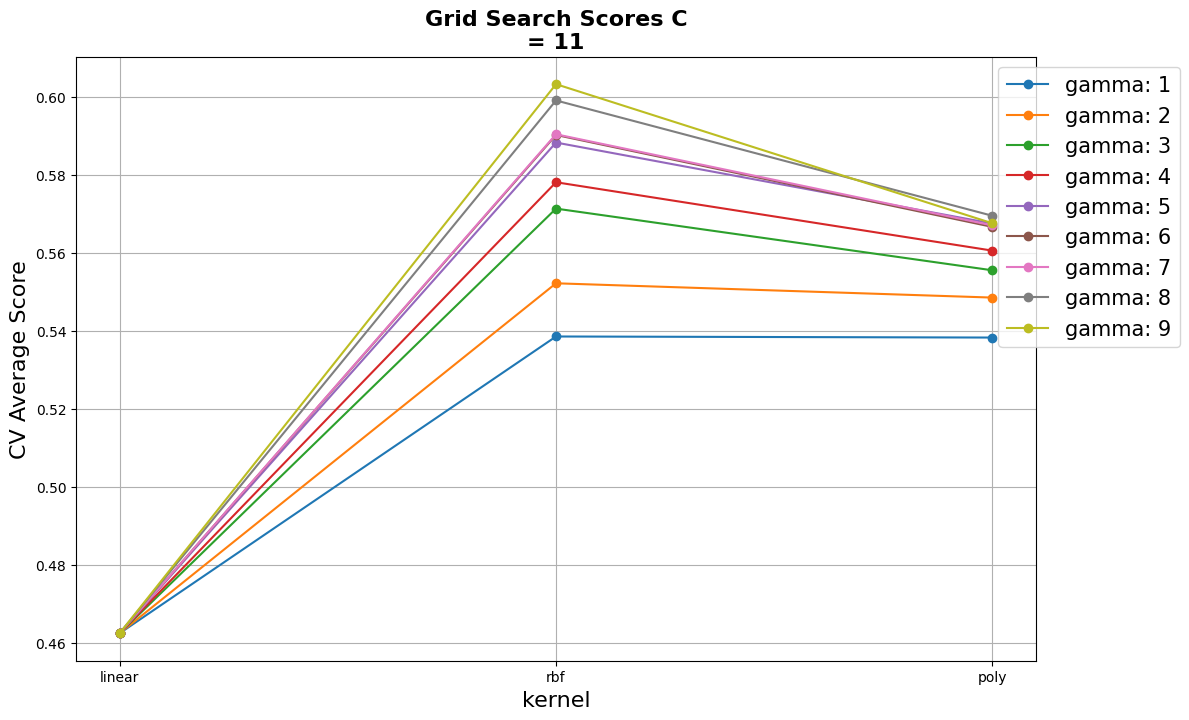

In [10]:
mean_score_limit=0.5
common_grid_search_analysis.plot_grid_search_2_params(gs_results, 'kernel', 'gamma', mean_score_limit, PLOT_PREFIX=PLOT_PREFIX, plot_counter=GLOBAL_FIG_COUNTER)
GLOBAL_FIG_COUNTER+=1

Plot saved as:  Figures/WINE_SVM_PLOT_GridScore_C_gamma_1.png


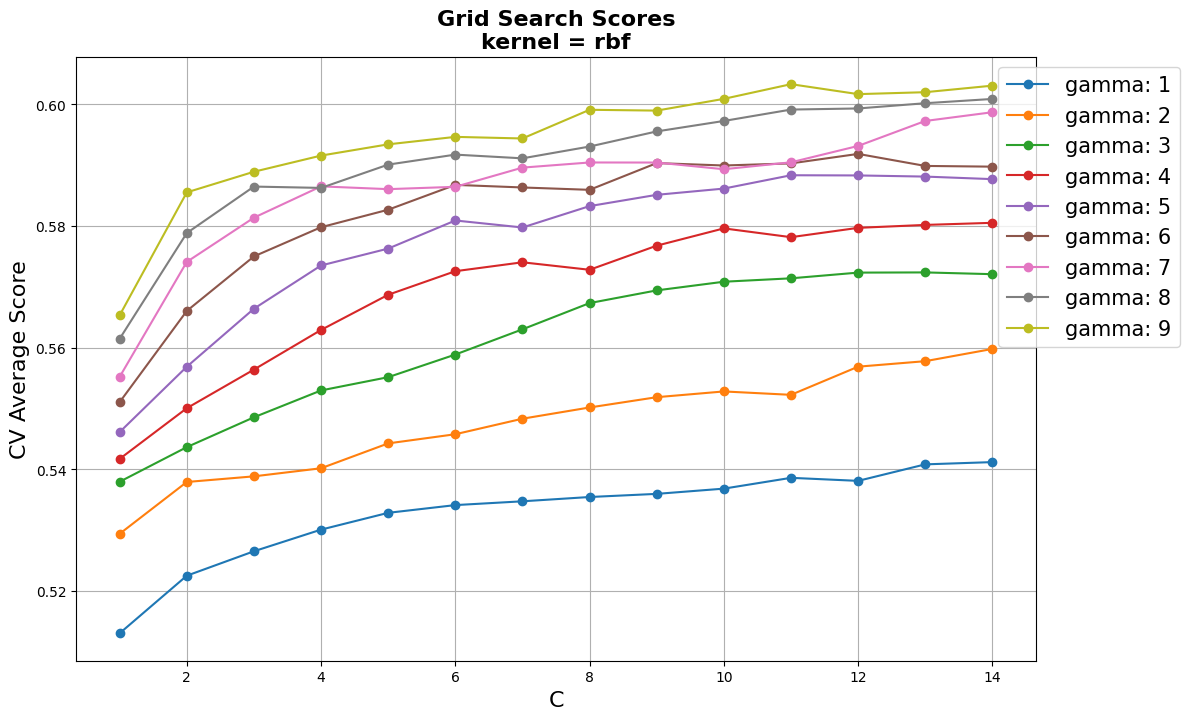

In [11]:
common_grid_search_analysis.plot_grid_search_2_params(gs_results, 'C', 'gamma', mean_score_limit, PLOT_PREFIX=PLOT_PREFIX, plot_counter=GLOBAL_FIG_COUNTER)
GLOBAL_FIG_COUNTER+=1

Plot saved as:  Figures/WINE_SVM_PLOT_GridScore_kernel_C_2.png


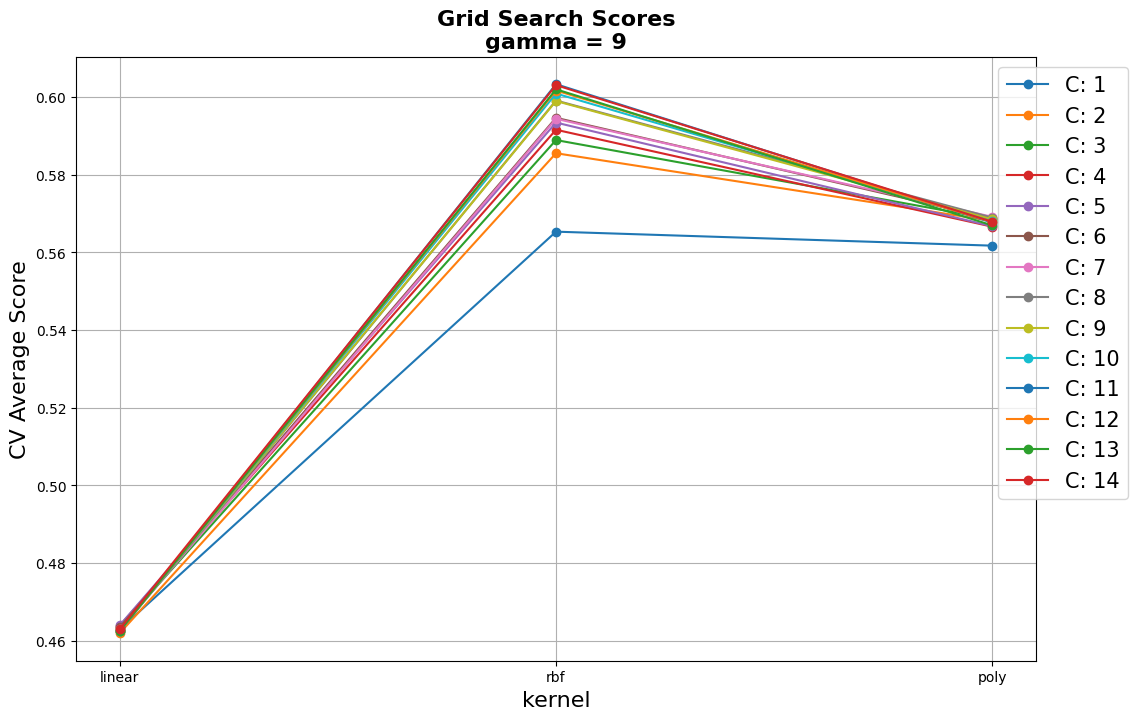

In [12]:
common_grid_search_analysis.plot_grid_search_2_params(gs_results, 'kernel', 'C', mean_score_limit, PLOT_PREFIX=PLOT_PREFIX, plot_counter=GLOBAL_FIG_COUNTER)
GLOBAL_FIG_COUNTER+=1


In [8]:
results = pd.DataFrame(gs_results.cv_results_)
results = results.sort_values(by=['rank_test_score'])
for param in results['params'][0].keys():
    print([i for i in results['params']])
    values = [i[param] for i in results['params']]
    results.insert(0, param, values)
results

[{'ccp_alpha': 0.0006000000000000001, 'max_features': 'auto', 'min_samples_split': 32}, {'ccp_alpha': 0.0008, 'max_features': 'auto', 'min_samples_split': 8}, {'ccp_alpha': 0.0009000000000000001, 'max_features': 'auto', 'min_samples_split': 22}, {'ccp_alpha': 0.0007, 'max_features': 'sqrt', 'min_samples_split': 20}, {'ccp_alpha': 0.0006000000000000001, 'max_features': 'sqrt', 'min_samples_split': 36}, {'ccp_alpha': 0.0008, 'max_features': 'auto', 'min_samples_split': 12}, {'ccp_alpha': 0.0004, 'max_features': 'sqrt', 'min_samples_split': 2}, {'ccp_alpha': 0.0008, 'max_features': 'auto', 'min_samples_split': 32}, {'ccp_alpha': 0.0009000000000000001, 'max_features': 'auto', 'min_samples_split': 44}, {'ccp_alpha': 0.001, 'max_features': 'sqrt', 'min_samples_split': 42}, {'ccp_alpha': 0.0006000000000000001, 'max_features': 'auto', 'min_samples_split': 2}, {'ccp_alpha': 0.0007, 'max_features': 'sqrt', 'min_samples_split': 4}, {'ccp_alpha': 0.001, 'max_features': 'sqrt', 'min_samples_split':

,min_samples_split,max_features,ccp_alpha,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_ccp_alpha,param_max_features,param_min_samples_split,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
447,32,auto,0.0006,0.087081,0.004534,0.001024,0.000079,0.0006,auto,32,...,0.653125,0.014164,1,0.797188,0.792969,0.795937,0.802031,0.790312,0.795687,0.003971
579,8,auto,0.0008,0.092153,0.003414,0.001395,0.000263,0.0008,auto,8,...,0.645875,0.008791,2,0.761406,0.750313,0.753906,0.742188,0.757812,0.753125,0.006614
658,22,auto,0.0009,0.094876,0.007422,0.001146,0.000205,0.0009,auto,22,...,0.644875,0.008191,3,0.732031,0.713125,0.735000,0.718594,0.742656,0.728281,0.010857
537,20,sqrt,0.0007,0.086667,0.000755,0.001236,0.000234,0.0007,sqrt,20,...,0.644625,0.007033,4,0.784531,0.773906,0.790469,0.786406,0.774062,0.781875,0.006723
473,36,sqrt,0.0006,0.082023,0.001851,0.001104,0.000204,0.0006,sqrt,36,...,0.643125,0.007756,5,0.793125,0.793125,0.782500,0.788438,0.783125,0.788062,0.004620
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6400,34,log2,0.0088,0.054607,0.002000,0.000887,0.000107,0.0088,log2,34,...,0.505000,0.000000,7087,0.505000,0.505000,0.505000,0.505000,0.505000,0.505000,0.000000
6233,36,sqrt,0.0086,0.081371,0.004046,0.001132,0.000215,0.0086,sqrt,36,...,0.505000,0.000000,7087,0.505000,0.505000,0.505000,0.505000,0.505000,0.505000,0.000000
6238,46,sqrt,0.0086,0.080019,0.003383,0.000877,0.000135,0.0086,sqrt,46,...,0.505000,0.000000,7087,0.505000,0.505000,0.505000,0.505000,0.505000,0.505000,0.000000
6181,28,log2,0.0085,0.056654,0.002093,0.001098,0.000397,0.0085,log2,28,...,0.505000,0.000000,7087,0.505000,0.505000,0.505000,0.505000,0.505000,0.505000,0.000000
